In [1]:
import pandas as pd
import re

reg = re.compile('[a-z]+$')
reg = re.compile('[a-z]+eu[xr]?$')
data = pd.read_csv('histwords_neighb25.csv')
print(data.columns)
array = data.as_matrix(columns=[data.columns[2]])
array = array.ravel()
nums_embeds = []
nums_neighbours = []
for item in range(data.shape[0]):
    nums_embeds.append(data.iloc[item, data.columns.get_loc('Embeddings similarity')])
    nums_neighbours.append(data.iloc[item, data.columns.get_loc('Neighbours similarity')])

print(len(nums_neighbours))
print(nums_neighbours)

Index(['Unnamed: 0', 'Word', 'Embeddings similarity', 'Neighbours similarity'], dtype='object')
37283
[0.86021767262999993, 0.86257545300999994, 0.0, 0.032945774764299995, 0.86110311544599993, 0.86057567687999992, 0.65080614191000008, 0.045559701186400001, 0.44268018263199999, 0.85696943213200005, 0.43953707832099997, 0.85591812886199992, 0.83492912758399995, 0.486410874429, 0.71570665858400007, 0.62851405833399998, 0.60974763292699996, 0.54436903537100001, 0.0437179787854, 0.857245704346, 0.26103487464000003, 0.86354314513600006, 0.375845474693, 0.0, 0.72874762714399999, 0.51772603178499998, 0.358129589651, 0.415137002325, 0.55987319414100001, 0.36510189866999998, 0.39220612341300004, 0.78084451678200006, 0.85769335306899996, 0.62624176213100002, 0.46991568134099998, 0.58976938961600001, 0.17829263284699998, 0.335873894964, 0.0, 0.17763104759599999, 0.75775246976300004, 0.341480299652, 0.21627680075199998, 0.50723751531299999, 0.57584167091100003, 0.573008129496, 0.85483868374299998, 

In [2]:
reg = re.compile('[a-z]+eu[xr]?$')
i = 0
for item in range(data.shape[0]):
    if data.iloc[item, data.columns.get_loc('Neighbours similarity')] == 0:
        if reg.match(data.iloc[item, data.columns.get_loc('Word')]):
            print(data.iloc[item, data.columns.get_loc('Word')])
            print(item)
            i += 1
    else:
        if reg.match(data.iloc[item, data.columns.get_loc('Word')]):
            print(data.iloc[item, data.columns.get_loc('Word')])
print(i)

amateur
bayeux
beaulieu
0


In [3]:
print(ranks1, ranks2)

NameError: name 'ranks1' is not defined

In [4]:
from scipy import stats

stats.spearmanr(ranks1, ranks2)

SpearmanrResult(correlation=0.61139037958449416, pvalue=0.0)

In [5]:
from scipy.stats import rankdata

ranks1 = rankdata(nums_embeds, method='min')
ranks2 = rankdata(nums_neighbours, method='min')
print(ranks1, ranks2)

[37283 37282 37281 ...,     3     2     1] [37253 37257     2 ..., 11558 19332     2]


Spearman rank correlation: 0.6114
Pearson correlation: 0.6289
Root mean squared difference: 0.2223


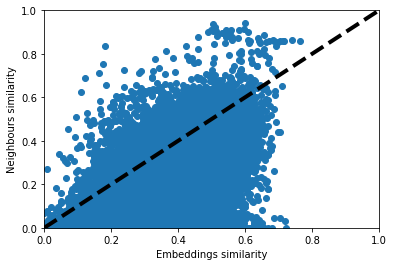

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

print('Spearman rank correlation: %.4f' % stats.spearmanr(nums_embeds, nums_neighbours)[0])
print('Pearson correlation: %.4f' % stats.pearsonr(nums_embeds, nums_neighbours)[0])
print('Root mean squared difference: %.4f' % (mean_squared_error(nums_embeds, nums_neighbours)) ** 0.5)

plt.scatter(nums_embeds, nums_neighbours)
plt.plot([0, 1], [0,1], 'k--', lw=4)
plt.xlabel('Embeddings similarity')
plt.ylabel('Neighbours similarity')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

8


In [5]:
import pandas as pd
import re

reg = re.compile('[a-z]+$')
reg = re.compile('[a-z]+eu[xr]?$')
data = pd.read_csv('histwords_neighb25.csv')
print(data.columns)
array = data.as_matrix(columns=[data.columns[2]])
array = array.ravel()
nums_embeds = []
nums_neighbours = []
for item in range(data.shape[0]):
    nums_embeds.append(data.iloc[item, data.columns.get_loc('Embeddings similarity')])
    nums_neighbours.append(data.iloc[item, data.columns.get_loc('Neighbours similarity')])

print(len(nums_neighbours))
print(nums_neighbours)

Index(['Unnamed: 0', 'Word', 'Embeddings similarity', 'Neighbours similarity'], dtype='object')
37283
[0.91328043036699991, 0.91579590289299995, 0.0, 0.0, 0.914477638132, 0.91280219465800005, 0.449172527948, 0.113805149681, 0.64290939775099998, 0.91238101123699988, 0.58065062117799993, 0.91231617859000003, 0.79777115458000003, 0.549541562358, 0.75352044013600006, 0.53091930981900004, 0.90683953225799996, 0.767396409665, 0.119869906195, 0.914532296972, 0.13995769283500001, 0.91648155978900003, 0.47976212169600002, 0.0, 0.76608810471900002, 0.79254146683100002, 0.40126851286700005, 0.53242459547099996, 0.76697168381699998, 0.3472490828, 0.292603470644, 0.71140571282199994, 0.91501588770999998, 0.75758509874599989, 0.54480861806999992, 0.76665411630299996, 0.234122943788, 0.64119283396000004, 0.0, 0.27493326292699999, 0.77975933740100001, 0.42887262627800005, 0.29866254633200001, 0.76967447425799995, 0.72645867213799997, 0.61727126601400006, 0.82085728888699994, 0.11092798024499999, 0.692

In [9]:
from scipy.stats import rankdata

ranks1 = rankdata(nums_embeds, method='min')
ranks2 = rankdata(nums_neighbours, method='min')
print(ranks1, ranks2)

[37283 37282 37281 ...,     3     2     1] [37261 37267     1 ...,     1 26864     1]


Spearman rank correlation: 0.5833
Pearson correlation: 0.6029
Root mean squared difference: 0.2258


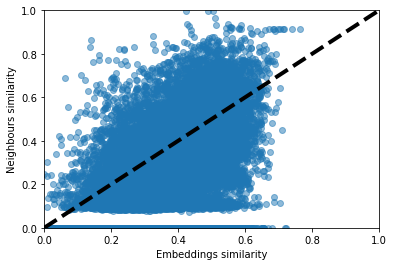

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

print('Spearman rank correlation: %.4f' % stats.spearmanr(nums_embeds, nums_neighbours)[0])
print('Pearson correlation: %.4f' % stats.pearsonr(nums_embeds, nums_neighbours)[0])
print('Root mean squared difference: %.4f' % (mean_squared_error(nums_embeds, nums_neighbours)) ** 0.5)

plt.scatter(nums_embeds, nums_neighbours, alpha=0.5)
plt.plot([0, 1], [0,1], 'k--', lw=4)
plt.xlabel('Embeddings similarity')
plt.ylabel('Neighbours similarity')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

In [193]:
import pandas as pd
import re

reg = re.compile('[a-z]+$')
reg = re.compile('[a-z]+eu[xr]?$')
data = pd.read_csv('histwords_neighbsmooth_test25.csv')
print(data.columns)
array = data.as_matrix(columns=[data.columns[2]])
array = array.ravel()
nums_embeds = []
nums_neighbours = []
for item in range(data.shape[0]):
    nums_embeds.append(data.iloc[item, data.columns.get_loc('Embeddings similarity')])
    nums_neighbours.append(data.iloc[item, data.columns.get_loc('Neighbours similarity')])

print(len(nums_neighbours))
print(nums_neighbours)

Index(['Unnamed: 0', 'Word', 'Embeddings similarity', 'Neighbours similarity'], dtype='object')
3808
[0.088457351712500007, 0.25530020150299998, 0.0, 0.0, 0.18934020911400001, 0.33503056549299998, 0.89336694333399991, 0.0188829776293, 0.328825713779, -0.0073323326232300002, 0.0, 0.065332414040199988, 0.0, 0.0, 0.0057019807146599993, 0.0, 0.038912534964000003, 0.14367126278200001, 0.66580166870199997, 0.011291506295100001, 0.0, 0.13677311363299999, 0.0, 0.14898098411900002, 0.158742698135, 0.74049407745399998, 0.56317334721099999, 0.31642022810199999, 0.0, 0.667263137861, 0.0, 0.0, 0.0, 0.0, 0.256526578191, 0.0, 0.0, 0.0, 0.76995422858999996, 0.0, 0.0, 0.0, 0.23959724987300002, 0.17984611348999999, 0.0, 0.11945833105999999, 0.0, 0.236126144205, 0.0, 0.0, 0.85002613718999998, 0.089674689482700007, 0.0, 0.0, 0.0, 0.0, 0.34128294006600002, 0.0, 0.0, 0.0, 0.31993419750099999, 0.0, 0.0, 0.0, -0.17954438658100003, 0.0, 0.044370951918000001, 0.0, 0.014395052641600001, 0.712696156247, 0.3347010

In [154]:
reg = re.compile('[a-z]+eu[xr]?$')
i = 0
for item in range(data.shape[0]):
    if data.iloc[item, data.columns.get_loc('Neighbours similarity')] == 0:
        if reg.match(data.iloc[item, data.columns.get_loc('Word')]):
            print(data.iloc[item, data.columns.get_loc('Word')])
            print(item)
            i += 1
    else:
        if reg.match(data.iloc[item, data.columns.get_loc('Word')]):
            print(data.iloc[item, data.columns.get_loc('Word')])
print(i)

grandeur
dieu
devereux
4809
honneur
7108
coeur
amateur
bayeux
entrepreneur
12258
fleur
empereur
13924
chaulieu
13945
cceur
13948
beaujeu
13957
7


In [142]:
print(ranks1, ranks2)

[13974 13973 13972 ...,     1     1     1] [13961 13961 13961 ...,     1     1     1]


In [179]:
from scipy import stats

stats.spearmanr(ranks1, ranks2)

SpearmanrResult(correlation=0.44671212847396252, pvalue=0.0)

In [180]:
from scipy.stats import rankdata

ranks1 = rankdata(nums_embeds, method='min')
ranks2 = rankdata(nums_neighbours, method='min')
print(ranks1, ranks2)

[3808 3807 3806 ...,    3    2    1] [3807 3646 3389 ...,    1    1    1]


In [ ]:
import matplotlib.pyplot as plt


print('Spearman rank correlation: %.4f' % stats.spearmanr(nums_embeds, nums_neighbours)[0])
print('Pearson correlation: %.4f' % stats.pearsonr(nums_embeds, nums_neighbours)[0])
plt.scatter(nums_embeds, nums_neighbours)
plt.plot([0, 1], [0,1], 'k--', lw=4)
plt.xlabel('Embeddings similarity')
plt.ylabel('Neighbours similarity')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()